In [1]:
import json
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Функция считывания файлов, возвращает словарь, в котором ключ - userid, значение - вложенный словарь с двумя ключами
#action и tag - значения которых - списки, соответствющие событиям, произошедшим для пользователя.
def open_file(filename):
    data = {}
    with open(filename, encoding="utf8") as f:
        for line in f:            
            if json.loads(line)['userid'] not in data.keys():
                data[json.loads(line)['userid']] = {'action':[], 'tag':[]}
                data[json.loads(line)['userid']]['action'].append(json.loads(line)['custom_params']['action'])
                data[json.loads(line)['userid']]['tag'].append(json.loads(line)['custom_params']['tag'])
            else:
                data[json.loads(line)['userid']]['action'].append(json.loads(line)['custom_params']['action'])
                data[json.loads(line)['userid']]['tag'].append(json.loads(line)['custom_params']['tag'])
    return data        
data_1 = open_file('Spisok1')
data_2 = open_file('Spisok2')
print(len(data_1.keys()), len(data_2.keys()))

6810 7786


In [49]:
#Сортировка словаря, расставляет пользователей по количеству событий, от большего к меньшему
def sort_dictio(data):
    data1 = sorted(data, key=lambda k: len(data[k]['action']), reverse=True)
    new_dict = {}
    for i in data1:
        new_dict[i] = data[i]
    return new_dict
new_dict_1 = sort_dictio(data_1)
#new_dict_1

In [50]:
new_dict_2 = sort_dictio(data_2)
#new_dict_2

In [4]:
#Два списка, соответствующие порядку тегов для файла 1 (custom_list_1) и файла 2 (custom_list_2) соответственно
custom_list_1 = ['bini-mini-dancing', 'bini-boxes-abc', 'wow-baby-wizard', 'wow-funny-food3', 'bini-mini-123', 
                 'bini-super-numbers','wow-funny-food2', 'bini-mini', 'wow-funny-food', 'bini-draw-abc']
custom_list_2 = ['bini-super-numbers', 'wow-funny-food2','wow-funny-food3','bini-mini-123', 'bini-mini', 'bini-mini-dancing',
                 'wow-baby-wizard', 'bini-boxes-abc', 'wow-funny-food', 'bini-draw-abc']

In [51]:
#Функция, которая проводит сортировку словаря пользователей и подсчитывает количество каждого события ('show','visible', 'touch')
# для каждого тега у пользователя
def create_dict_sort(new_dict, custom_list):
    dict_out = {}
    for key in new_dict.keys():
        tags= {}
        a = Counter(new_dict[key]['tag'])
        for i in custom_list:
            arr = np.array(new_dict[key]['tag'])
            ii = np.where(arr == i)[0]            
            A = []
            for j in ii:
                A.append(new_dict[key]['action'][j])
            inner_dict = {'show':A.count('show'), 'visible':A.count('visible'), 'touch':A.count('touch')}        
            tags[i] = inner_dict            
        dict_out[key] = tags
    return dict_out
dict_out_1 = (create_dict_sort(new_dict_1, custom_list_1))            
#dict_out_1

In [52]:
dict_out_2 = (create_dict_sort(new_dict_2, custom_list_2))
#dict_out_2

In [7]:
# Функция, создающая сводную таблицу. Столбцы - Теги, по порядку, соответствующему списку из файла (слева направо - от лучших
#к худшим). Строки - пользователи, по порядку от большего  кол-ва событий к меньшему (сверху вниз)
def create_data_frame(dict_out, custom_list):
    df = pd.DataFrame(dict_out).T
    df = df[custom_list]
    return df
df_1 = create_data_frame(dict_out_1, custom_list_1)
df_1

,bini-mini-dancing,bini-boxes-abc,wow-baby-wizard,wow-funny-food3,bini-mini-123,bini-super-numbers,wow-funny-food2,bini-mini,wow-funny-food,bini-draw-abc
79ecbf0856964481b81cc8d58b6f3b19,"{'show': 166, 'visible': 107, 'touch': 4}","{'show': 0, 'visible': 0, 'touch': 0}","{'show': 188, 'visible': 124, 'touch': 3}","{'show': 96, 'visible': 44, 'touch': 1}","{'show': 98, 'visible': 38, 'touch': 7}","{'show': 108, 'visible': 42, 'touch': 3}","{'show': 0, 'visible': 0, 'touch': 0}","{'show': 118, 'visible': 44, 'touch': 5}","{'show': 107, 'visible': 45, 'touch': 2}","{'show': 181, 'visible': 120, 'touch': 3}"
b3cc77fdc16634102bf51f6575acd844,"{'show': 104, 'visible': 18, 'touch': 0}","{'show': 96, 'visible': 12, 'touch': 0}","{'show': 93, 'visible': 8, 'touch': 0}","{'show': 95, 'visible': 9, 'touch': 0}","{'show': 93, 'visible': 11, 'touch': 0}","{'show': 97, 'visible': 10, 'touch': 0}","{'show': 97, 'visible': 11, 'touch': 0}","{'show': 94, 'visible': 9, 'touch': 0}","{'show': 0, 'visible': 0, 'touch': 0}","{'show': 0, 'visible': 0, 'touch': 0}"
d3724d049c0f647d18250bd61582fb4f,"{'show': 90, 'visible': 62, 'touch': 0}","{'show': 111, 'visible': 77, 'touch': 3}","{'show': 88, 'visible': 57, 'touch': 5}","{'show': 51, 'visible': 19, 'touch': 0}","{'show': 37, 'visible': 13, 'touch': 0}","{'show': 41, 'visible': 17, 'touch': 0}","{'show': 37, 'visible': 16, 'touch': 0}","{'show': 37, 'visible': 13, 'touch': 0}","{'show': 0, 'visible': 0, 'touch': 0}","{'show': 0, 'visible': 0, 'touch': 0}"
530c4aa64328a45a5b1dea3f8d36fd5b,"{'show': 107, 'visible': 59, 'touch': 1}","{'show': 0, 'visible': 0, 'touch': 0}","{'show': 90, 'visible': 43, 'touch': 0}","{'show': 51, 'visible': 7, 'touch': 0}","{'show': 52, 'visible': 7, 'touch': 0}","{'show': 54, 'visible': 9, 'touch': 0}","{'show': 54, 'visible': 6, 'touch': 0}","{'show': 0, 'visible': 0, 'touch': 0}","{'show': 0, 'visible': 0, 'touch': 0}","{'show': 59, 'visible': 14, 'touch': 0}"
a3e97a24b23c14909aee88f282547ad2,"{'show': 66, 'visible': 16, 'touch': 1}","{'show': 60, 'visible': 18, 'touch': 3}","{'show': 54, 'visible': 9, 'touch': 0}","{'show': 50, 'visible': 7, 'touch': 1}","{'show': 42, 'visible': 5, 'touch': 0}","{'show': 44, 'visible': 2, 'touch': 0}","{'show': 58, 'visible': 8, 'touch': 0}","{'show': 0, 'visible': 0, 'touch': 0}","{'show': 51, 'visible': 7, 'touch': 3}","{'show': 0, 'visible': 0, 'touch': 0}"
259dd30e1af504a9d842eb2f373600b8,"{'show': 53, 'visible': 34, 'touch': 10}","{'show': 0, 'visible': 0, 'touch': 0}","{'show': 60, 'visible': 39, 'touch': 2}","{'show': 45, 'visible': 24, 'touch': 1}","{'show': 30, 'visible': 14, 'touch': 0}","{'show': 30, 'visible': 15, 'touch': 1}","{'show': 0, 'visible': 0, 'touch': 0}","{'show': 30, 'visible': 14, 'touch': 0}","{'show': 25, 'visible': 10, 'touch': 4}","{'show': 34, 'visible': 18, 'touch': 2}"
30b0ba5fc01c84c38af4b2950e103a06,"{'show': 74, 'visible': 73, 'touch': 3}","{'show': 75, 'visible': 60, 'touch': 5}","{'show': 59, 'visible': 48, 'touch': 2}","{'show': 14, 'visible': 10, 'touch': 3}","{'show': 9, 'visible': 8, 'touch': 1}","{'show': 4, 'visible': 2, 'touch': 3}","{'show': 2, 'visible': 1, 'touch': 0}","{'show': 5, 'visible': 2, 'touch': 0}","{'show': 0, 'visible': 0, 'touch': 0}","{'show': 0, 'visible': 0, 'touch': 0}"
c7bce5f2827f84f2599b3f808a9d9118,"{'show': 46, 'visible': 22, 'touch': 0}","{'show': 66, 'visible': 43, 'touch': 0}","{'show': 58, 'visible': 31, 'touch': 0}","{'show': 32, 'visible': 9, 'touch': 0}","{'show': 28, 'visible': 7, 'touch': 0}","{'show': 30, 'visible': 8, 'touch': 1}","{'show': 31, 'visible': 8, 'touch': 0}","{'show': 30, 'visible': 6, 'touch': 1}","{'show': 0, 'visible': 0, 'touch': 0}","{'show': 0, 'visible': 0, 'touch': 0}"
b100b8541ecd84e47ba1f73774a3952b,"{'show': 48, 'visible': 31, 'touch': 3}","{'show': 43, 'visible': 22, 'touch': 0}","{'show': 38, 'visible': 22, 'touch': 0}","{'show': 34, 'visible': 19, 'touch': 3}","{'show': 33, 'visible': 14, 'touch': 0}","{'show': 34, 'visible': 1

In [8]:
df_2 = create_data_frame(dict_out_2, custom_list_2)
df_2

,bini-super-numbers,wow-funny-food2,wow-funny-food3,bini-mini-123,bini-mini,bini-mini-dancing,wow-baby-wizard,bini-boxes-abc,wow-funny-food,bini-draw-abc
463f6832fec304b9ca24abb14f94519f,"{'show': 162, 'visible': 67, 'touch': 2}","{'show': 190, 'visible': 91, 'touch': 0}","{'show': 203, 'visible': 99, 'touch': 2}","{'show': 0, 'visible': 0, 'touch': 0}","{'show': 149, 'visible': 42, 'touch': 3}","{'show': 134, 'visible': 29, 'touch': 0}","{'show': 130, 'visible': 22, 'touch': 2}","{'show': 126, 'visible': 26, 'touch': 2}","{'show': 56, 'visible': 20, 'touch': 0}","{'show': 0, 'visible': 0, 'touch': 0}"
726efe01cead74a60b039a917a743250,"{'show': 156, 'visible': 49, 'touch': 6}","{'show': 163, 'visible': 47, 'touch': 6}","{'show': 187, 'visible': 69, 'touch': 7}","{'show': 2, 'visible': 2, 'touch': 1}","{'show': 0, 'visible': 0, 'touch': 0}","{'show': 131, 'visible': 32, 'touch': 4}","{'show': 125, 'visible': 20, 'touch': 5}","{'show': 136, 'visible': 24, 'touch': 5}","{'show': 130, 'visible': 20, 'touch': 11}","{'show': 131, 'visible': 25, 'touch': 16}"
5a4c5872ffe564bec894f23a027aec72,"{'show': 159, 'visible': 11, 'touch': 1}","{'show': 161, 'visible': 15, 'touch': 1}","{'show': 162, 'visible': 9, 'touch': 0}","{'show': 156, 'visible': 10, 'touch': 2}","{'show': 0, 'visible': 0, 'touch': 0}","{'show': 156, 'visible': 10, 'touch': 1}","{'show': 152, 'visible': 9, 'touch': 2}","{'show': 150, 'visible': 7, 'touch': 0}","{'show': 153, 'visible': 9, 'touch': 0}","{'show': 0, 'visible': 0, 'touch': 0}"
cb6d0978cbfd3429283c568c0a490fb8,"{'show': 92, 'visible': 39, 'touch': 0}","{'show': 114, 'visible': 60, 'touch': 1}","{'show': 112, 'visible': 65, 'touch': 0}","{'show': 65, 'visible': 23, 'touch': 2}","{'show': 62, 'visible': 15, 'touch': 0}","{'show': 61, 'visible': 17, 'touch': 1}","{'show': 69, 'visible': 24, 'touch': 0}","{'show': 68, 'visible': 22, 'touch': 1}","{'show': 0, 'visible': 0, 'touch': 0}","{'show': 0, 'visible': 0, 'touch': 0}"
d5b881b14e05940aab3e8c2049a5eb7b,"{'show': 58, 'visible': 40, 'touch': 6}","{'show': 92, 'visible': 76, 'touch': 2}","{'show': 86, 'visible': 68, 'touch': 6}","{'show': 33, 'visible': 11, 'touch': 3}","{'show': 6, 'visible': 5, 'touch': 2}","{'show': 29, 'visible': 14, 'touch': 0}","{'show': 27, 'visible': 12, 'touch': 2}","{'show': 30, 'visible': 15, 'touch': 2}","{'show': 28, 'visible': 16, 'touch': 1}","{'show': 0, 'visible': 0, 'touch': 0}"
528c75308df4f4e6f8a4cdce391f9309,"{'show': 151, 'visible': 15, 'touch': 0}","{'show': 0, 'visible': 0, 'touch': 0}","{'show': 92, 'visible': 10, 'touch': 0}","{'show': 0, 'visible': 0, 'touch': 0}","{'show': 0, 'visible': 0, 'touch': 0}","{'show': 60, 'visible': 8, 'touch': 0}","{'show': 161, 'visible': 9, 'touch': 0}","{'show': 61, 'visible': 9, 'touch': 0}","{'show': 83, 'visible': 8, 'touch': 2}","{'show': 0, 'visible': 0, 'touch': 0}"
fdee542f9112a472cadc46a9bf74df13,"{'show': 71, 'visible': 35, 'touch': 1}","{'show': 78, 'visible': 44, 'touch': 1}","{'show': 66, 'visible': 23, 'touch': 0}","{'show': 51, 'visible': 10, 'touch': 2}","{'show': 53, 'visible': 17, 'touch': 1}","{'show': 60, 'visible': 17, 'touch': 0}","{'show': 51, 'visible': 10, 'touch': 0}","{'show': 51, 'visible': 9, 'touch': 0}","{'show': 0, 'visible': 0, 'touch': 0}","{'show': 0, 'visible': 0, 'touch': 0}"
d8ce433dda227407d8708645cd486533,"{'show': 70, 'visible': 5, 'touch': 0}","{'show': 68, 'visible': 8, 'touch': 0}","{'show': 68, 'visible': 15, 'touch': 0}","{'show': 60, 'visible': 7, 'touch': 0}","{'show': 66, 'visible': 5, 'touch': 0}","{'show': 71, 'visible': 9, 'touch': 0}","{'show': 83, 'visible': 10, 'touch': 0}","{'show': 73, 'visible': 8, 'touch': 0}","{'show': 0, 'visible': 0, 'touch': 0}","{'show': 0, 'visible': 0, 'touch': 0}"
8038d7839c1e44afca2a61863faa9dd9,"{'show': 69, 'visible': 4, 'touch': 0}","{'show': 71, 'visible': 3, 'touch': 0}","{'show': 70, 'visible': 6, 'touch': 0}","{'show': 73, 'visible': 5, 'touch': 1}","{'show': 70, 'visible': 10, 'touch': 1}","{'sh

In [9]:
#Функция для подсчета суммарного количества событий для всех пользователей. Возвращает словарь с ключом Тег и кол-ваом событий
# 'show','visible', 'touch' соответственно
def total_dict(dict_out, custom_list, df):
    total_dict_out = {}
    for j in custom_list:
        total_dict_in = {'show':0, 'visible':0, 'touch':0}
        for i in dict_out.keys():
            total_dict_in['show']+=df.loc[i][j]['show']
            total_dict_in['visible']+=df.loc[i][j]['visible']
            total_dict_in['touch']+=df.loc[i][j]['touch']
        total_dict_out[j] = total_dict_in
    return total_dict_out
total_dict_1 = total_dict(dict_out_1, custom_list_1, df_1)
total_dict_1

{'bini-mini-dancing': {'show': 24729, 'visible': 17179, 'touch': 884},
 'bini-boxes-abc': {'show': 22718, 'visible': 15766, 'touch': 708},
 'wow-baby-wizard': {'show': 26267, 'visible': 17530, 'touch': 793},
 'wow-funny-food3': {'show': 15245, 'visible': 8198, 'touch': 554},
 'bini-mini-123': {'show': 11811, 'visible': 5814, 'touch': 445},
 'bini-super-numbers': {'show': 11331, 'visible': 5240, 'touch': 437},
 'wow-funny-food2': {'show': 10329, 'visible': 4595, 'touch': 355},
 'bini-mini': {'show': 9912, 'visible': 4524, 'touch': 389},
 'wow-funny-food': {'show': 5009, 'visible': 2361, 'touch': 227},
 'bini-draw-abc': {'show': 1372, 'visible': 824, 'touch': 40}}

In [10]:
total_dict_2 = total_dict(dict_out_2, custom_list_2, df_2)
total_dict_2

{'bini-super-numbers': {'show': 26811, 'visible': 17957, 'touch': 843},
 'wow-funny-food2': {'show': 29405, 'visible': 19667, 'touch': 818},
 'wow-funny-food3': {'show': 26931, 'visible': 17407, 'touch': 759},
 'bini-mini-123': {'show': 16495, 'visible': 8855, 'touch': 586},
 'bini-mini': {'show': 12906, 'visible': 6212, 'touch': 512},
 'bini-mini-dancing': {'show': 15492, 'visible': 7452, 'touch': 555},
 'wow-baby-wizard': {'show': 15750, 'visible': 7293, 'touch': 553},
 'bini-boxes-abc': {'show': 12456, 'visible': 5538, 'touch': 391},
 'wow-funny-food': {'show': 7334, 'visible': 3270, 'touch': 273},
 'bini-draw-abc': {'show': 3115, 'visible': 1466, 'touch': 105}}

In [11]:
# Функция, создающая всодную таблицу. Строки - Теги, порядок от лучшего к худшему. Столбцы - события
def total_dataframe(total_dict_out):
    df = pd.DataFrame(total_dict_out)
    df = df.reindex(['show', 'visible', 'touch'])
    df = df.T
    return df
df_fin_1 = total_dataframe(total_dict_1)
df_fin_1

,show,visible,touch
bini-mini-dancing,24729,17179,884
bini-boxes-abc,22718,15766,708
wow-baby-wizard,26267,17530,793
wow-funny-food3,15245,8198,554
bini-mini-123,11811,5814,445
bini-super-numbers,11331,5240,437
wow-funny-food2,10329,4595,355
bini-mini,9912,4524,389
wow-funny-food,5009,2361,227
bini-draw-abc,1372,824,40


In [38]:
df_fin_2 = total_dataframe(total_dict_2)
df_fin_2

,show,visible,touch
bini-super-numbers,26811,17957,843
wow-funny-food2,29405,19667,818
wow-funny-food3,26931,17407,759
bini-mini-123,16495,8855,586
bini-mini,12906,6212,512
bini-mini-dancing,15492,7452,555
wow-baby-wizard,15750,7293,553
bini-boxes-abc,12456,5538,391
wow-funny-food,7334,3270,273
bini-draw-abc,3115,1466,105


In [13]:
#Подсчет суммарного количества событий 'show', 'visible', 'touch' по двум файлам
df_fin_1.sum()

show       138723
visible     82031
touch        4832
dtype: int64

In [14]:
df_fin_2.sum()

show       166695
visible     95117
touch        5395
dtype: int64

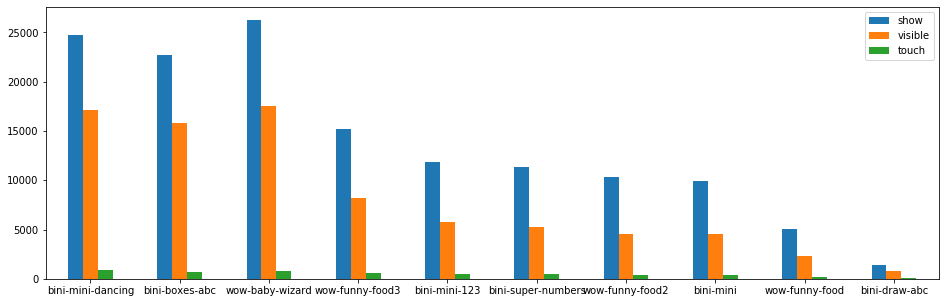

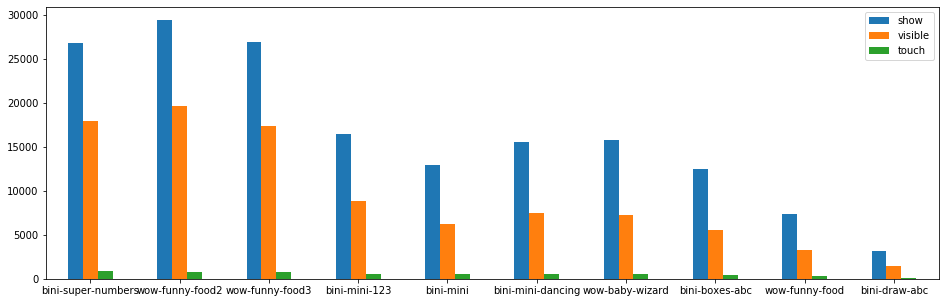

In [15]:
#Построение диаграмм по сводной таблице.
ax1 = df_fin_1.plot.bar(figsize = (16,5), rot = 0)
ax2 = df_fin_2.plot.bar(figsize = (16,5), rot = 0)

In [16]:
#Построение таблицы по суммарному количеству событий
df_piv_1 = df_fin_1.sum()
df_piv_2 = df_fin_2.sum()
df_piv = pd.concat([df_piv_1, df_piv_2], axis=1)
df_piv

,0,1
show,138723,166695
visible,82031,95117
touch,4832,5395


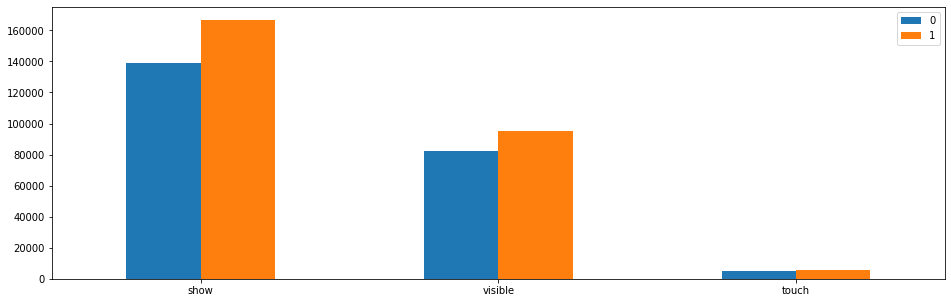

In [17]:
#Построение графика по двум файлам с суммарным количеством событий
ax2 = df_piv.plot.bar(figsize = (16,5), rot = 0)

In [25]:
#По данным можно заметить, что в списке 2 больше уникальных пользователей (7786 против 6810 в первом) и большее количество 
#всех видов событий. Необходимо проверить конверсию пользователей между событиями, чтобы сделать вывод

In [18]:
#Подсчет процента перехода от show к visible и к touch. show считается как 100%
df_sum_1 = df_fin_1.sum()
df_sum_1['visible'] = df_sum_1['visible']/df_sum_1['show']*100
df_sum_1['touch'] = df_sum_1['touch']/df_sum_1['show']*100
df_sum_1['show'] = df_sum_1['show']/df_sum_1['show']*100
df_sum_2 = df_fin_2.sum()
df_sum_2['visible'] = df_sum_2['visible']/df_sum_2['show']*100
df_sum_2['touch'] = df_sum_2['touch']/df_sum_2['show']*100
df_sum_2['show'] = df_sum_2['show']/df_sum_2['show']*100
print(df_sum_1, df_sum_2)

show       100
visible     59
touch        3
dtype: int64 show       100
visible     57
touch        3
dtype: int64


In [19]:
#Построение таблицы с процентом перехода от show к visible и к touch по всем тегам для 2 файлов
df_fin_1['visible'] = df_fin_1['visible']/df_fin_1['show']*100
df_fin_1['touch'] = df_fin_1['touch']/df_fin_1['show']*100
df_fin_1['show'] = df_fin_1['show']/df_fin_1['show']*100
df_fin_1

,show,visible,touch
bini-mini-dancing,100.0,69.469044,3.574750
bini-boxes-abc,100.0,69.398715,3.116472
wow-baby-wizard,100.0,66.737732,3.018997
wow-funny-food3,100.0,53.775008,3.633978
bini-mini-123,100.0,49.225298,3.767674
bini-super-numbers,100.0,46.244815,3.856676
wow-funny-food2,100.0,44.486398,3.436925
bini-mini,100.0,45.641646,3.924536
wow-funny-food,100.0,47.135157,4.531843
bini-draw-abc,100.0,60.058309,2.915452


In [39]:
df_fin_2['visible'] = df_fin_2['visible']/df_fin_2['show']*100
df_fin_2['touch'] = df_fin_2['touch']/df_fin_2['show']*100
df_fin_2['show'] = df_fin_2['show']/df_fin_2['show']*100
df_fin_2

,show,visible,touch
bini-super-numbers,100.0,66.976241,3.144232
wow-funny-food2,100.0,66.883183,2.781840
wow-funny-food3,100.0,64.635550,2.818313
bini-mini-123,100.0,53.682934,3.552592
bini-mini,100.0,48.132651,3.967147
bini-mini-dancing,100.0,48.102246,3.582494
wow-baby-wizard,100.0,46.304762,3.511111
bini-boxes-abc,100.0,44.460501,3.139049
wow-funny-food,100.0,44.586856,3.722389
bini-draw-abc,100.0,47.062600,3.370787


In [21]:
# Статистика по событию touch. Среднее значение, стандартное отклонение, квантили
df_fin_1['touch'].describe()

count    10.000000
mean      3.577730
std       0.486604
min       2.915452
25%       3.196585
50%       3.604364
75%       3.834426
max       4.531843
Name: touch, dtype: float64

In [22]:
df_fin_2['touch'].describe()

count    10.000000
mean      3.358995
std       0.384788
min       2.781840
25%       3.140345
50%       3.440949
75%       3.575019
max       3.967147
Name: touch, dtype: float64

In [23]:
#Статистика по событию visible. Среднее значение, стандартное отклонение, квантили
df_fin_1['visible'].describe()

count    10.000000
mean     55.217212
std      10.279628
min      44.486398
25%      46.467401
50%      51.500153
75%      65.067876
max      69.469044
Name: visible, dtype: float64

In [24]:
df_fin_2['visible'].describe()

count    10.000000
mean     53.082753
std       9.400497
min      44.460501
25%      46.494222
50%      48.117449
75%      61.897396
max      66.976241
Name: visible, dtype: float64

In [26]:
#По величине конверсии события touch (его рассмотрим как целевое, осознанное действие с рекламным баннером) можно сказать, что
#между экспериментами нет решающей разницы. Немного лучше конверсия в эксперименте 1 (3.577730 > 3.358995, в среднем). Также
#в эксперименте 1 больше минимальное и максимальное значения. Однако во втором эксперименте произошло более чем на 500 (5395 
#против 4832) событий touch больше. Соответственно, 2 эксперимент был более эффективным, чем 1.

In [27]:
#В качестве улучшения 2 эксперимента предлагаю поменять порядок тегов. Рассмотрим порядок в эксперименте 2. Он представлен в 
#списке custom_list_2 и графике 2 в ячейке 15. Можно заметить, что количество событий в не уменьшается от лучшего тега к
#к худшему, а есть теги, которые опережают по количеству событий теги, идущие перед ними. Следовательно, они оказались более 
#эффективными и привлекательными. Первым способом улучшения эксперимента 2 является перестановка тегов по количеству событий, 
#от большего к меньшему. График представлен ниже

In [35]:
df_fin_3 = total_dataframe(total_dict_2)
df_fin_3 = df_fin_3.sort_values(by='show', ascending = False)
df_fin_3

,show,visible,touch
wow-funny-food2,29405,19667,818
wow-funny-food3,26931,17407,759
bini-super-numbers,26811,17957,843
bini-mini-123,16495,8855,586
wow-baby-wizard,15750,7293,553
bini-mini-dancing,15492,7452,555
bini-mini,12906,6212,512
bini-boxes-abc,12456,5538,391
wow-funny-food,7334,3270,273
bini-draw-abc,3115,1466,105


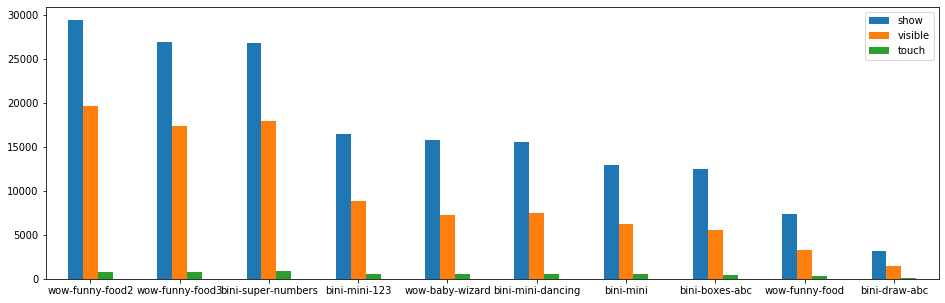

In [36]:
ax2 = df_fin_3.plot.bar(figsize = (16,5), rot = 0)

In [33]:
# В таком случае лучший порядок тегов будет соовтетствовать табилце в ячейке выше

In [34]:
# Второй способ - посчитать среднюю величину конверсии по 2 экспериментам и расставить теги по величине конверсии тега touch
# Тогда мы сможем вывести вперед наиболее популярные и привлекательные теги.

In [44]:
df_avg = df_fin_1.add(df_fin_2)
df_avg = df_avg/2.0
df_avg = df_avg.sort_values(by='touch', ascending = False)
df_avg

,show,visible,touch
wow-funny-food,100.0,45.861006,4.127116
bini-mini,100.0,46.887149,3.945841
bini-mini-123,100.0,51.454116,3.660133
bini-mini-dancing,100.0,58.785645,3.578622
bini-super-numbers,100.0,56.610528,3.500454
wow-baby-wizard,100.0,56.521247,3.265054
wow-funny-food3,100.0,59.205279,3.226146
bini-draw-abc,100.0,53.560455,3.143119
bini-boxes-abc,100.0,56.929608,3.127760
wow-funny-food2,100.0,55.684790,3.109382


In [45]:
# Порядок тегов по средней конверсии между двумя сетами представлен выше. Среднее значние позволяет не учитывать порядок 
# появления тегов (он различен в экспериментах), а только рассмотреть, какие теги были более привлекательны в 2 экспериментах.